### Importing Libraries

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.ensemble import VotingRegressor
from matplotlib.lines import Line2D

### Importing the dataset

In [27]:
df = pd.read_csv('../../../Datasets/RQ1/express_metrics.csv')
df.head(10)

,Unnamed: 0,version,release_date,timestamp,sqale_debt_ratio,vulnerabilities,security_rating,sqale_rating,complexity,cognitive_complexity,ncloc
0,0,0.0.1,2010-01-03,1262525122,2.6,0,1.0,1.0,844,677,2933
1,1,0.0.2,2010-01-10,1263182084,2.6,0,1.0,1.0,870,727,3019
2,2,0.1.0,2010-02-03,1265239678,2.4,0,1.0,1.0,952,793,3518
3,3,0.10.0,2010-04-30,1272648853,2.3,0,1.0,1.0,958,912,3455
4,4,0.10.1,2010-05-03,1272901321,2.3,0,1.0,1.0,958,912,3455
5,5,1.0.2,2011-01-10,1294711756,0.8,0,1.0,1.0,632,320,6964
6,6,1.0.3,2011-01-13,1294956540,0.8,0,1.0,1.0,632,320,6967
7,7,1.0.4,2011-02-05,1296933188,0.8,0,1.0,1.0,636,320,6985
8,8,1.0.5,2011-02-05,1296933381,0.8,0,1.0,1.0,636,320,6985
9,9,1.0.6,2011-02-07,1297115125,0.8,0,1.0,1.0,638,320,6996


### Information of the Dataframe 

In [28]:
df.describe()

,Unnamed: 0,timestamp,sqale_debt_ratio,vulnerabilities,security_rating,sqale_rating,complexity,cognitive_complexity,ncloc
count,49.00000,4.900000e+01,49.000000,49.0,49.0,49.0,49.000000,49.000000,49.000000
mean,24.00000,1.428478e+09,1.836735,0.0,1.0,1.0,2198.551020,744.142857,9719.959184
std,14.28869,1.201414e+08,0.479015,0.0,0.0,0.0,998.642038,242.140455,3596.760382
min,0.00000,1.262525e+09,0.800000,0.0,1.0,1.0,632.000000,320.000000,2933.000000
25%,12.00000,1.334514e+09,1.800000,0.0,1.0,1.0,1227.000000,553.000000,7315.000000
50%,24.00000,1.402354e+09,1.900000,0.0,1.0,1.0,2278.000000,700.000000,8952.000000
75%,36.00000,1.495002e+09,2.200000,0.0,1.0,1.0,2895.000000,924.000000,11856.000000
max,48.00000,1.665260e+09,2.600000,0.0,1.0,1.0,3919.000000,1231.000000,16843.000000


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            49 non-null     int64  
 1   version               49 non-null     object 
 2   release_date          49 non-null     object 
 3   timestamp             49 non-null     int64  
 4   sqale_debt_ratio      49 non-null     float64
 5   vulnerabilities       49 non-null     int64  
 6   security_rating       49 non-null     float64
 7   sqale_rating          49 non-null     float64
 8   complexity            49 non-null     int64  
 9   cognitive_complexity  49 non-null     int64  
 10  ncloc                 49 non-null     int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 4.3+ KB


### Updating Version Names

In [30]:
df['version'] = df['version'].str.replace('v', '')

In [31]:
df['version'] = 'v' + df['version']
df['version']

0             v0.0.1
1             v0.0.2
2             v0.1.0
3            v0.10.0
4            v0.10.1
5             v1.0.2
6             v1.0.3
7             v1.0.4
8             v1.0.5
9             v1.0.6
10           v2.5.10
11           v2.5.11
12            v2.5.4
13            v2.5.9
14      v3.0.0alpha1
15            v3.0.6
16            v3.1.0
17            v3.1.1
18            v3.1.2
19            v3.2.0
20           v3.10.0
21           v3.10.1
22           v3.10.2
23           v3.10.3
24           v3.10.4
25           v3.19.0
26           v3.19.1
27           v3.19.2
28           v3.20.0
29           v3.20.1
30           v4.13.4
31           v4.14.0
32           v4.14.1
33           v4.15.0
34           v4.15.1
35           v4.15.2
36           v4.15.3
37           v4.16.3
38           v4.16.4
39    v5.0.0-alpha.7
40           v4.17.0
41           v4.17.1
42    v5.0.0-alpha.8
43           v4.17.2
44           v4.17.3
45           v4.18.0
46           v4.18.1
47           

### Sorting accoriding to the timeframe

In [32]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [33]:
df.head(20)

,version,release_date,timestamp,sqale_debt_ratio,vulnerabilities,security_rating,sqale_rating,complexity,cognitive_complexity,ncloc
0,v0.0.1,2010-01-03,1262525122,2.6,0,1.0,1.0,844,677,2933
1,v0.0.2,2010-01-10,1263182084,2.6,0,1.0,1.0,870,727,3019
2,v0.1.0,2010-02-03,1265239678,2.4,0,1.0,1.0,952,793,3518
3,v0.10.0,2010-04-30,1272648853,2.3,0,1.0,1.0,958,912,3455
4,v0.10.1,2010-05-03,1272901321,2.3,0,1.0,1.0,958,912,3455
5,v1.0.2,2011-01-10,1294711756,0.8,0,1.0,1.0,632,320,6964
6,v1.0.3,2011-01-13,1294956540,0.8,0,1.0,1.0,632,320,6967
7,v1.0.4,2011-02-05,1296933188,0.8,0,1.0,1.0,636,320,6985
8,v1.0.5,2011-02-05,1296933381,0.8,0,1.0,1.0,636,320,6985
9,v1.0.6,2011-02-07,1297115125,0.8,0,1.0,1.0,638,320,6996


## Correlation

In [34]:
df_cor = df.drop(['version', 'release_date', 'timestamp','sqale_rating'], axis=1)

### Pearson Correlation

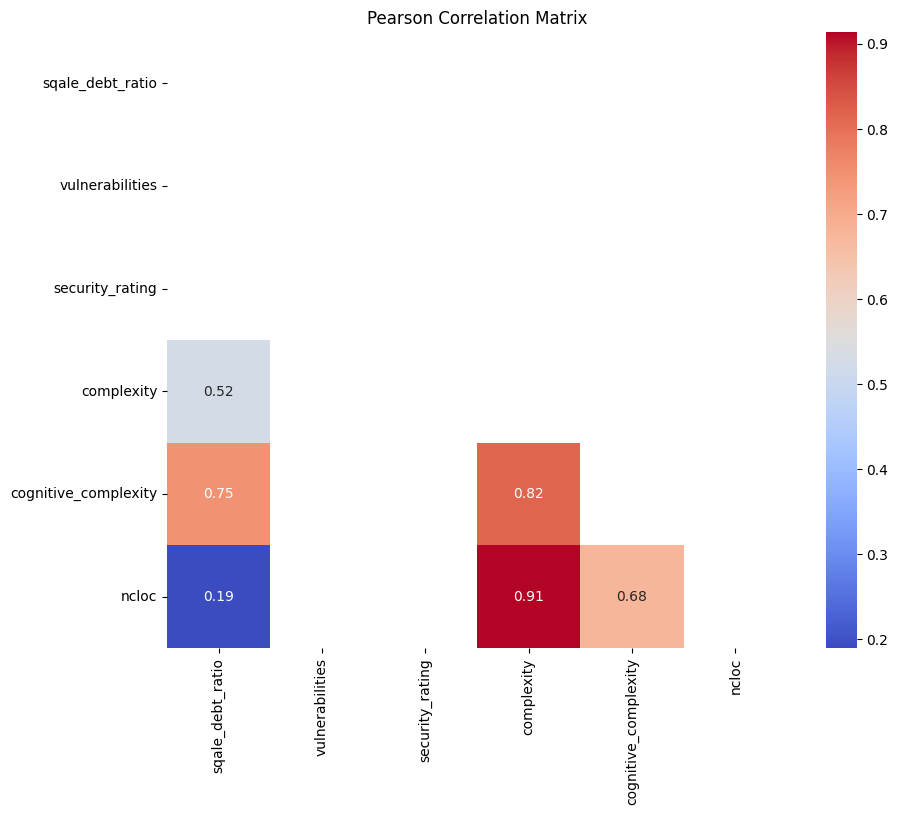

In [35]:
correlation_matrix = df_cor.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm')
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)
plt.title('Pearson Correlation Matrix')
plt.show()

### Spearman Correlation

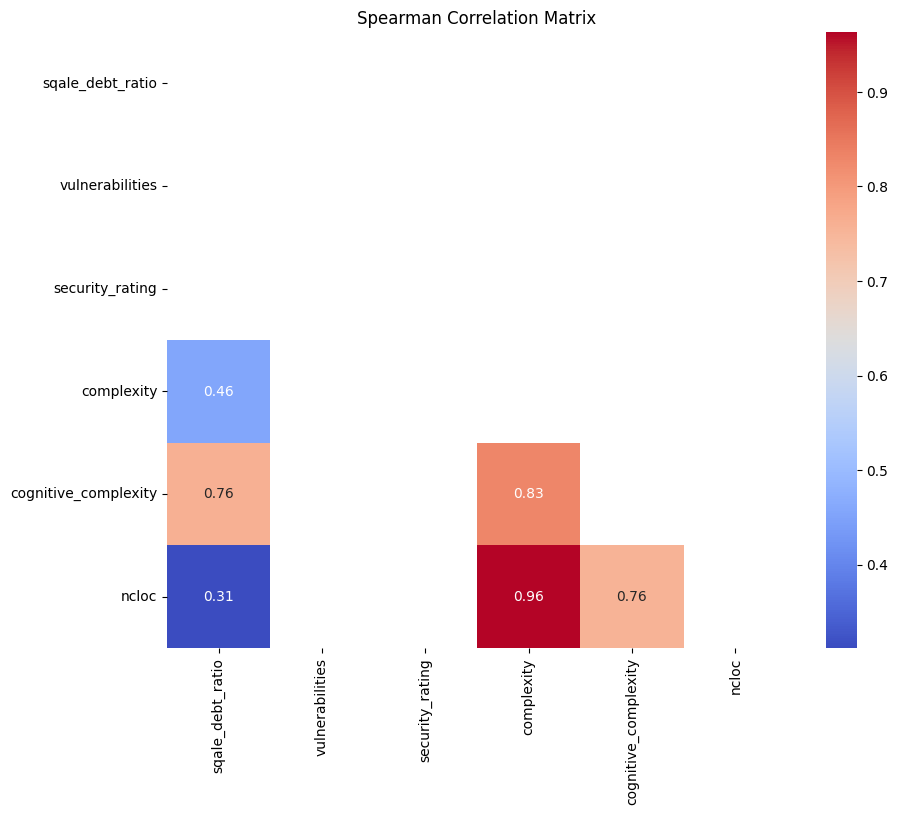

In [36]:
correlation_matrix = df_cor.corr(method ='spearman')

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm')
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)
plt.title('Spearman Correlation Matrix')
plt.show()

In [37]:
df['timestamp']

0     1262525122
1     1263182084
2     1265239678
3     1272648853
4     1272901321
5     1294711756
6     1294956540
7     1296933188
8     1296933381
9     1297115125
10    1339800671
11    1341005254
12    1325522021
13    1333419678
14    1334514100
15    1357354324
16    1359174538
17    1364840758
18    1365794042
19    1366054481
20    1401770427
21    1401828309
22    1401845734
23    1402025938
24    1402354432
25    1420783632
26    1421828296
27    1422821753
28    1424312755
29    1425183387
30    1453428645
31    1466089424
32    1485642084
33    1488406938
34    1488773972
35    1488807278
36    1495001651
37    1520876324
38    1539229845
39    1540607355
40    1558056342
41    1558844695
42    1585181687
43    1639712449
44    1645063422
45    1650912808
46    1651260746
47    1665259902
48    1644883994
Name: timestamp, dtype: int64

### Checking for the categorical and numerical columns

In [38]:
df_cor.columns

Index(['sqale_debt_ratio', 'vulnerabilities', 'security_rating', 'complexity',
       'cognitive_complexity', 'ncloc'],
      dtype='object')

In [39]:
columns = ['sqale_debt_ratio', 'vulnerabilities', 'security_rating', 'sqale_rating','complexity',
       'cognitive_complexity', 'ncloc']
for col in columns: 
    print(f'Count for {col}')   
    print(df[col].value_counts())
    print('------------------------')

Count for sqale_debt_ratio
sqale_debt_ratio
1.8    10
2.2     9
0.8     5
1.2     5
1.9     5
2.1     5
2.0     5
2.6     2
2.3     2
2.4     1
Name: count, dtype: int64
------------------------
Count for vulnerabilities
vulnerabilities
0    49
Name: count, dtype: int64
------------------------
Count for security_rating
security_rating
1.0    49
Name: count, dtype: int64
------------------------
Count for sqale_rating
sqale_rating
1.0    49
Name: count, dtype: int64
------------------------
Count for complexity
complexity
2278    3
2298    2
958     2
632     2
636     2
2276    2
3206    2
2886    2
2967    1
2867    1
2895    1
2898    1
2952    1
3532    1
2649    1
2865    1
3524    1
3544    1
3595    1
3912    1
3916    1
2866    1
844     1
2315    1
1743    1
952     1
638     1
1227    1
1228    1
1219    1
1224    1
1831    1
2305    1
1864    1
1875    1
1878    1
1910    1
2287    1
870     1
3919    1
Name: count, dtype: int64
------------------------
Count for cognitive_c

### Categorical Columns Visulaization

C:\Users\Sadik Yasin\AppData\Local\Temp\ipykernel_7424\1301555775.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  countplot = sns.countplot(x=col, data=df, ax=ax, palette='Set2')
C:\Users\Sadik Yasin\AppData\Local\Temp\ipykernel_7424\1301555775.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  countplot = sns.countplot(x=col, data=df, ax=ax, palette='Set2')
C:\Users\Sadik Yasin\AppData\Local\Temp\ipykernel_7424\1301555775.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  countplot = sns.countplot(x=col, data=df, ax=ax, palette='Set2')
C:\Users\Sadik Yasin\AppData\Local

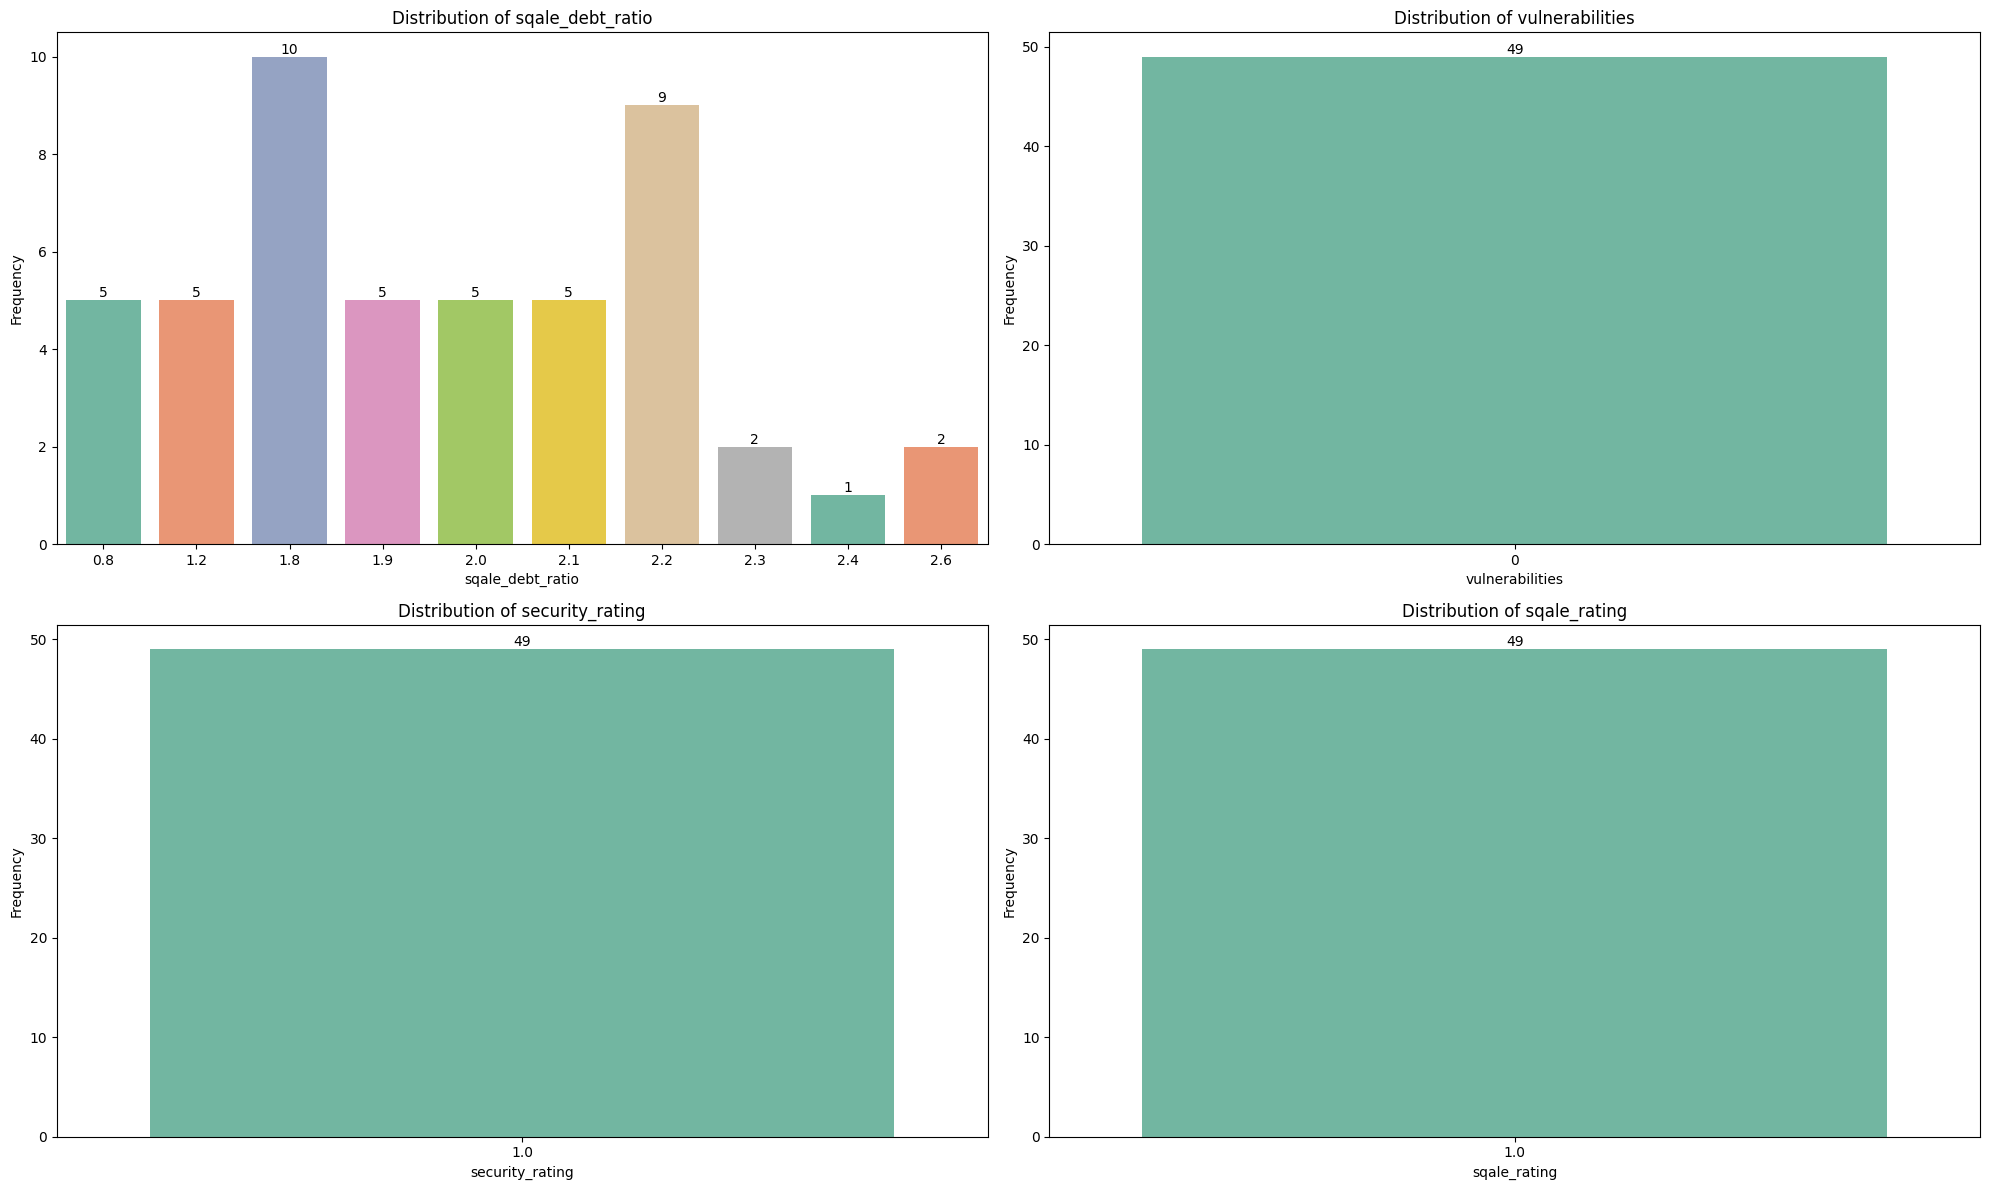

In [40]:
categorical_columns = ['sqale_debt_ratio', 'vulnerabilities', 'security_rating', 'sqale_rating']
fig, axs = plt.subplots(2, 2, figsize=(20, 12))
for ax, col in zip(axs.flatten(), categorical_columns):
    countplot = sns.countplot(x=col, data=df, ax=ax, palette='Set2')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Distribution of {col}')
    for p in countplot.patches:
        countplot.annotate(format(p.get_height(), '.0f'), 
                           (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha = 'center', va = 'center', 
                           xytext = (0, 5), 
                           textcoords = 'offset points')
plt.tight_layout()
plt.show()

### Numerical Columns Visualization

#### Using Histogram

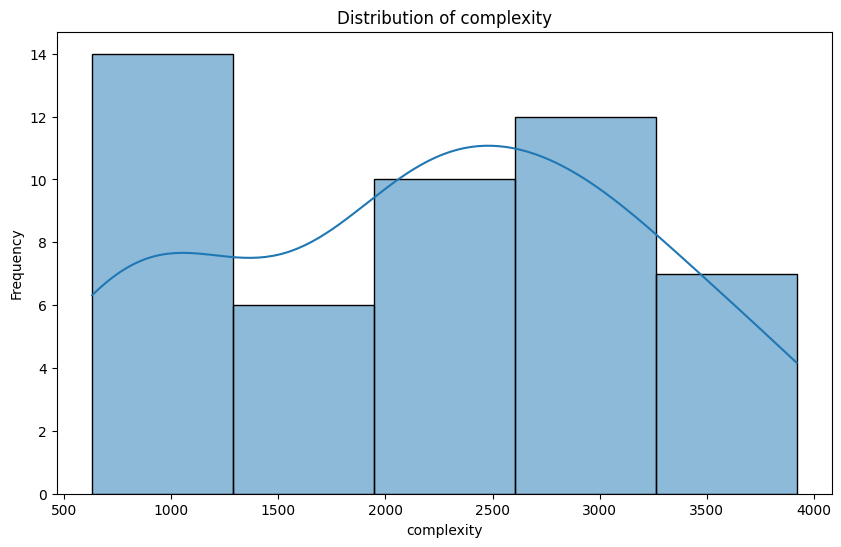

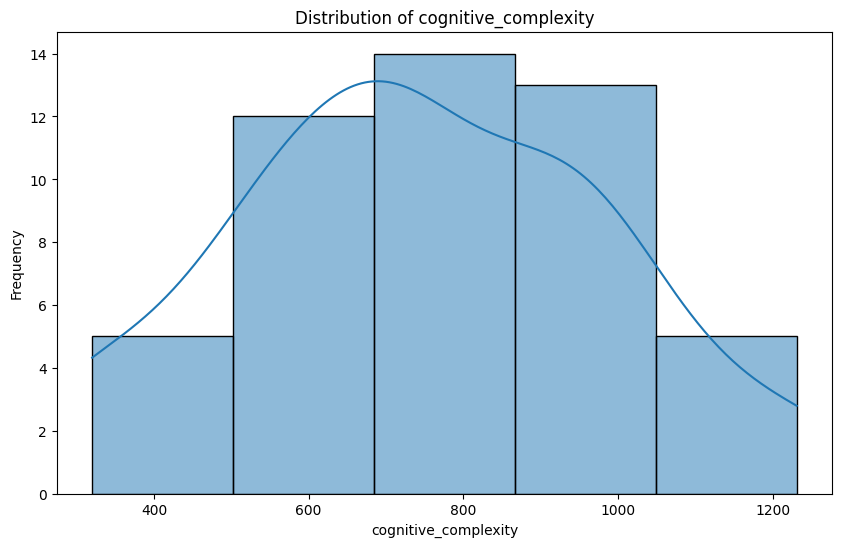

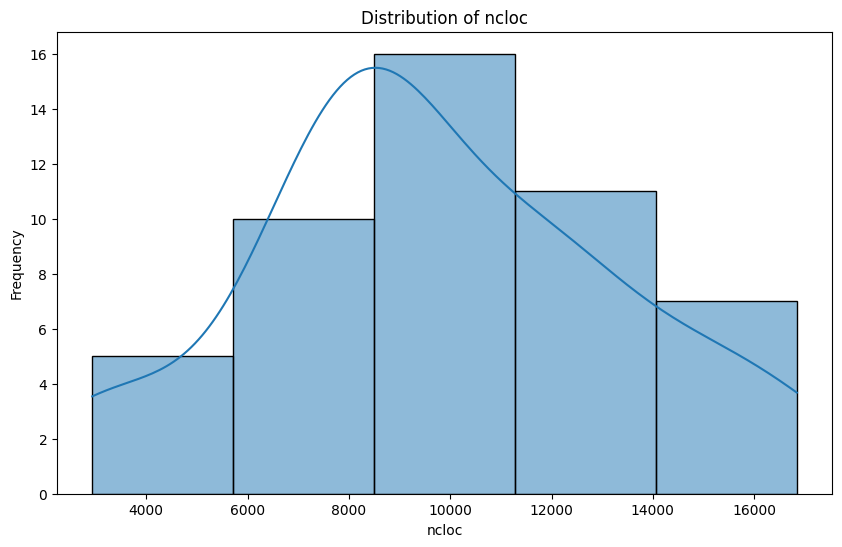

In [41]:
numerical_columns = ['complexity', 'cognitive_complexity', 'ncloc']

for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    histplot = sns.histplot(df[col], bins=5, kde=True)
    plt.title(f'Distribution of {col}')
    histplot.set_ylabel('Frequency')
    plt.show()

#### Using Boxplot

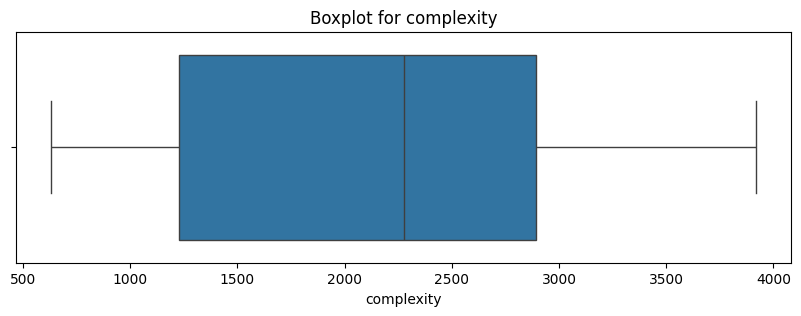

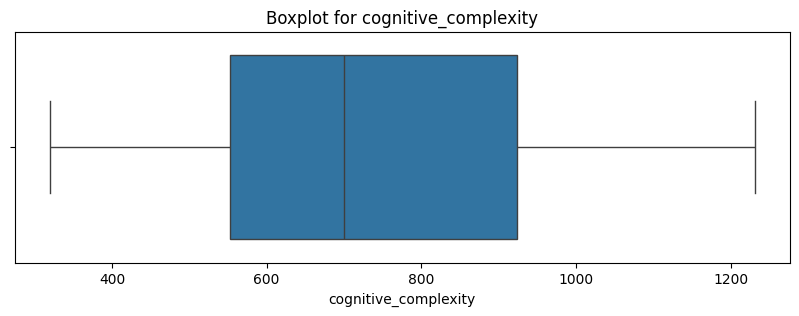

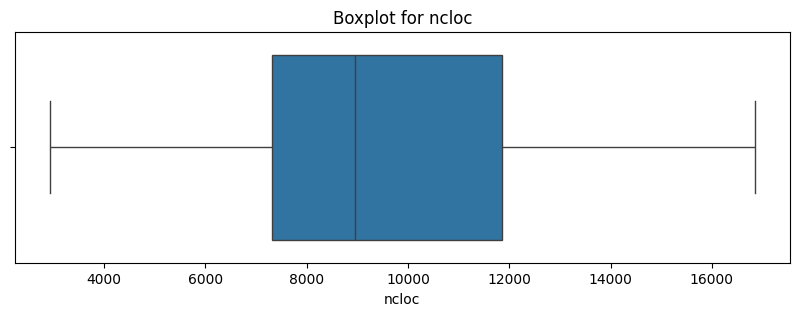

In [42]:
for col in numerical_columns:
    plt.figure(figsize=(10, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

### Visualization using Control Chart

In [43]:
columns_for_controlChart = ['sqale_debt_ratio', 'vulnerabilities', 'security_rating', 'sqale_rating', 'complexity', 'cognitive_complexity', 'ncloc']

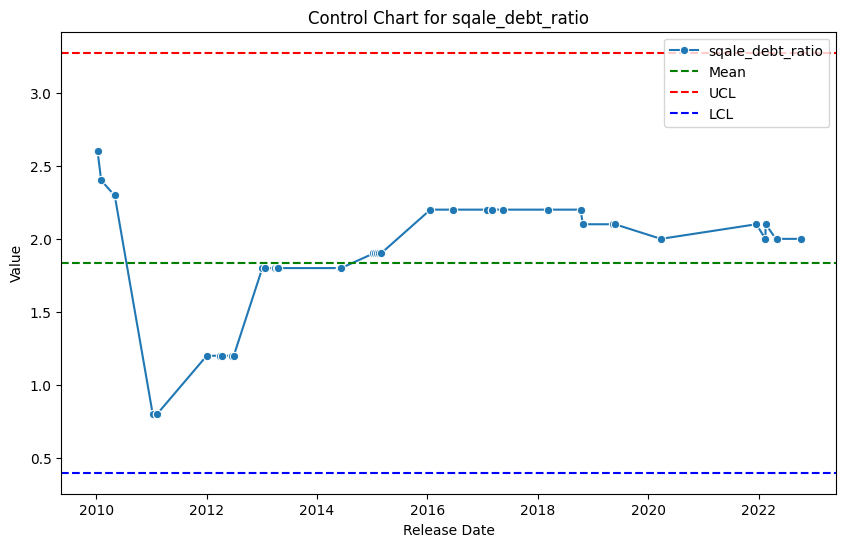

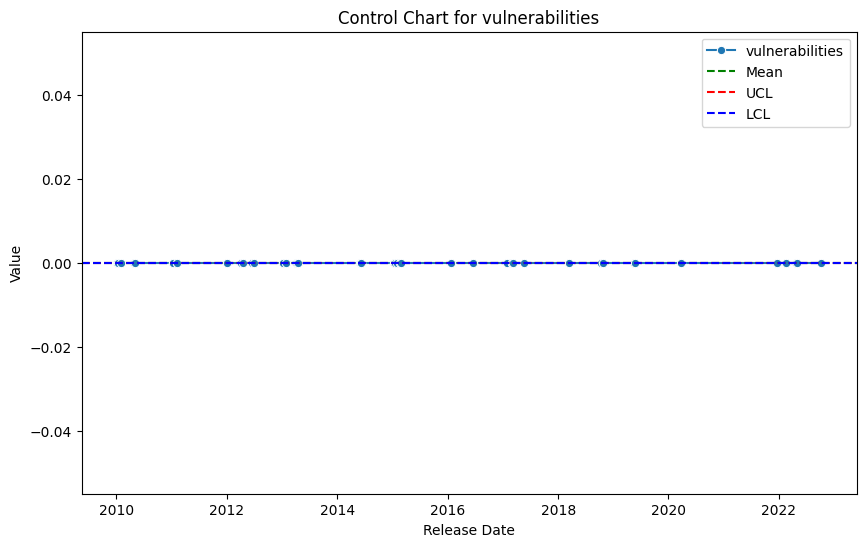

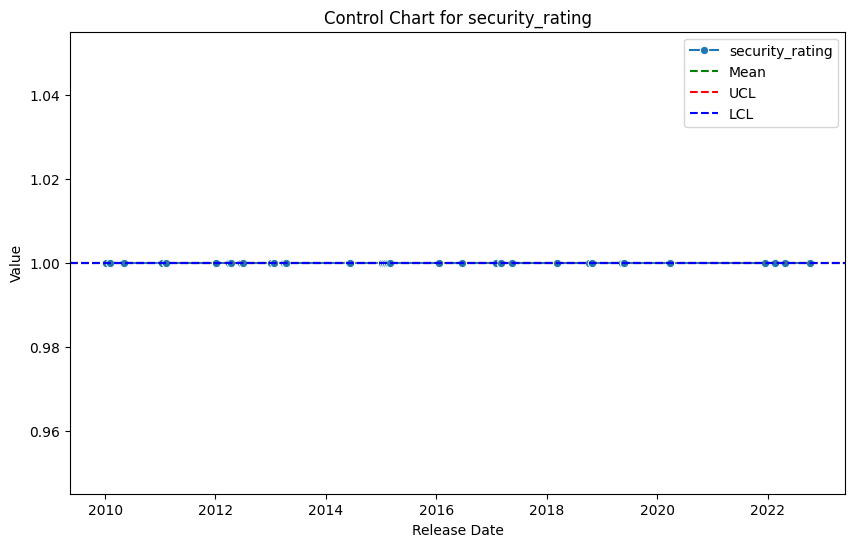

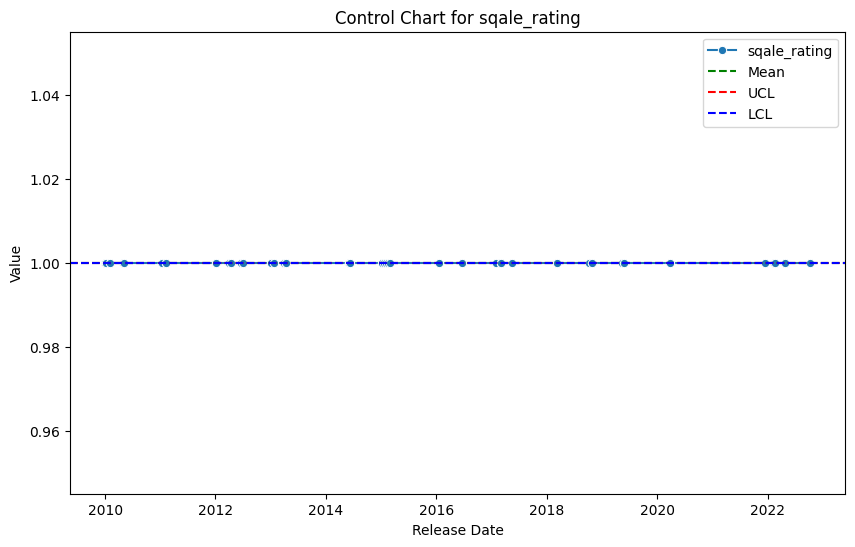

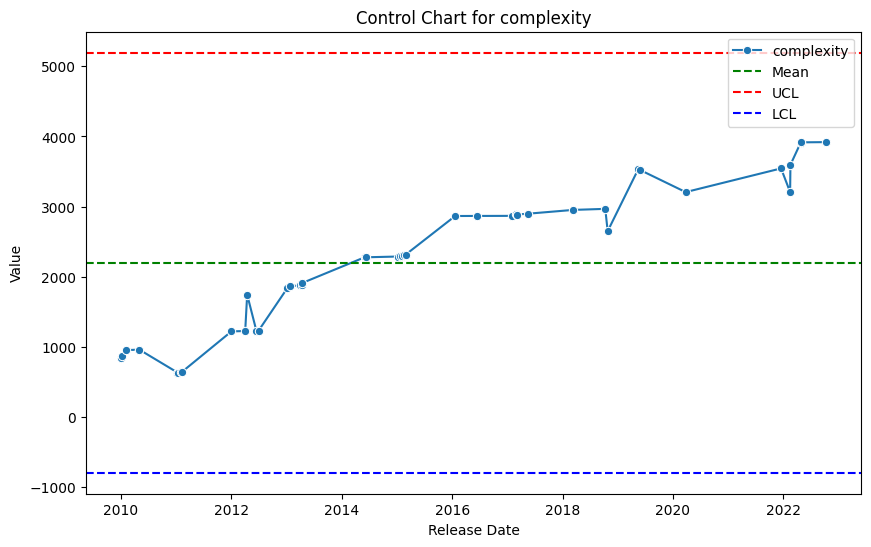

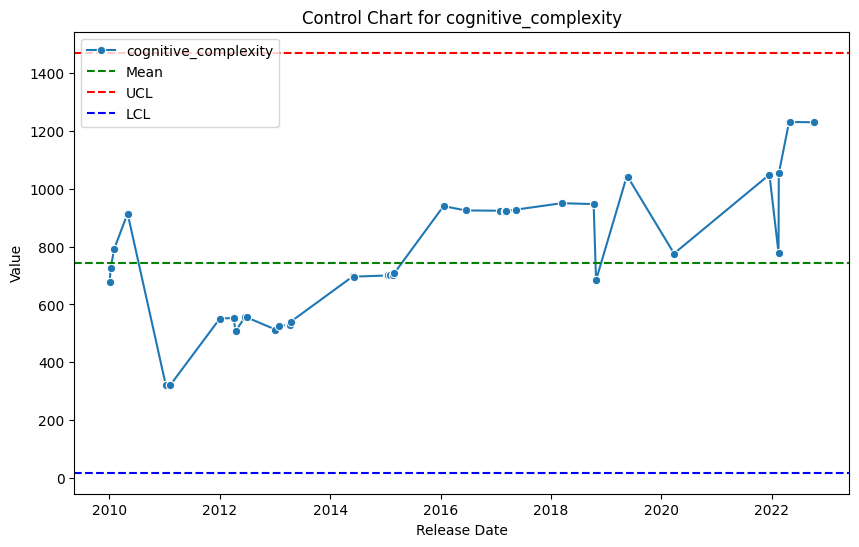

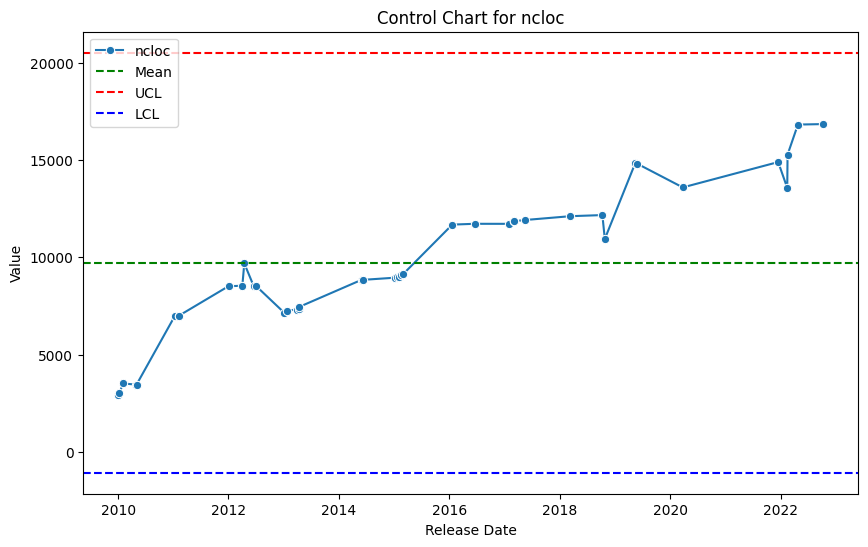

In [44]:
df['release_date'] = pd.to_datetime(df['release_date'])

# Sort DataFrame by 'release_date'
df = df.sort_values('release_date')

for col in columns_for_controlChart:
    plt.figure(figsize=(10, 6))
    
    # Calculate mean and standard deviation
    mean = df[col].mean()
    std_dev = df[col].std()
    
    # Calculate control limits
    ucl = mean + 3*std_dev
    lcl = mean - 3*std_dev
    
    # Plot the data, mean, and control limits
    sns.lineplot(x=df['release_date'], y=df[col], label=col, marker='o')
    plt.axhline(mean, color='g', linestyle='--', label='Mean')
    plt.axhline(ucl, color='r', linestyle='--', label='UCL')
    plt.axhline(lcl, color='b', linestyle='--', label='LCL')
    
    plt.title(f'Control Chart for {col}')
    plt.ylabel('Value')
    plt.xlabel('Release Date')
    plt.legend()
    plt.show()

### Visualizing every column using Pairplot

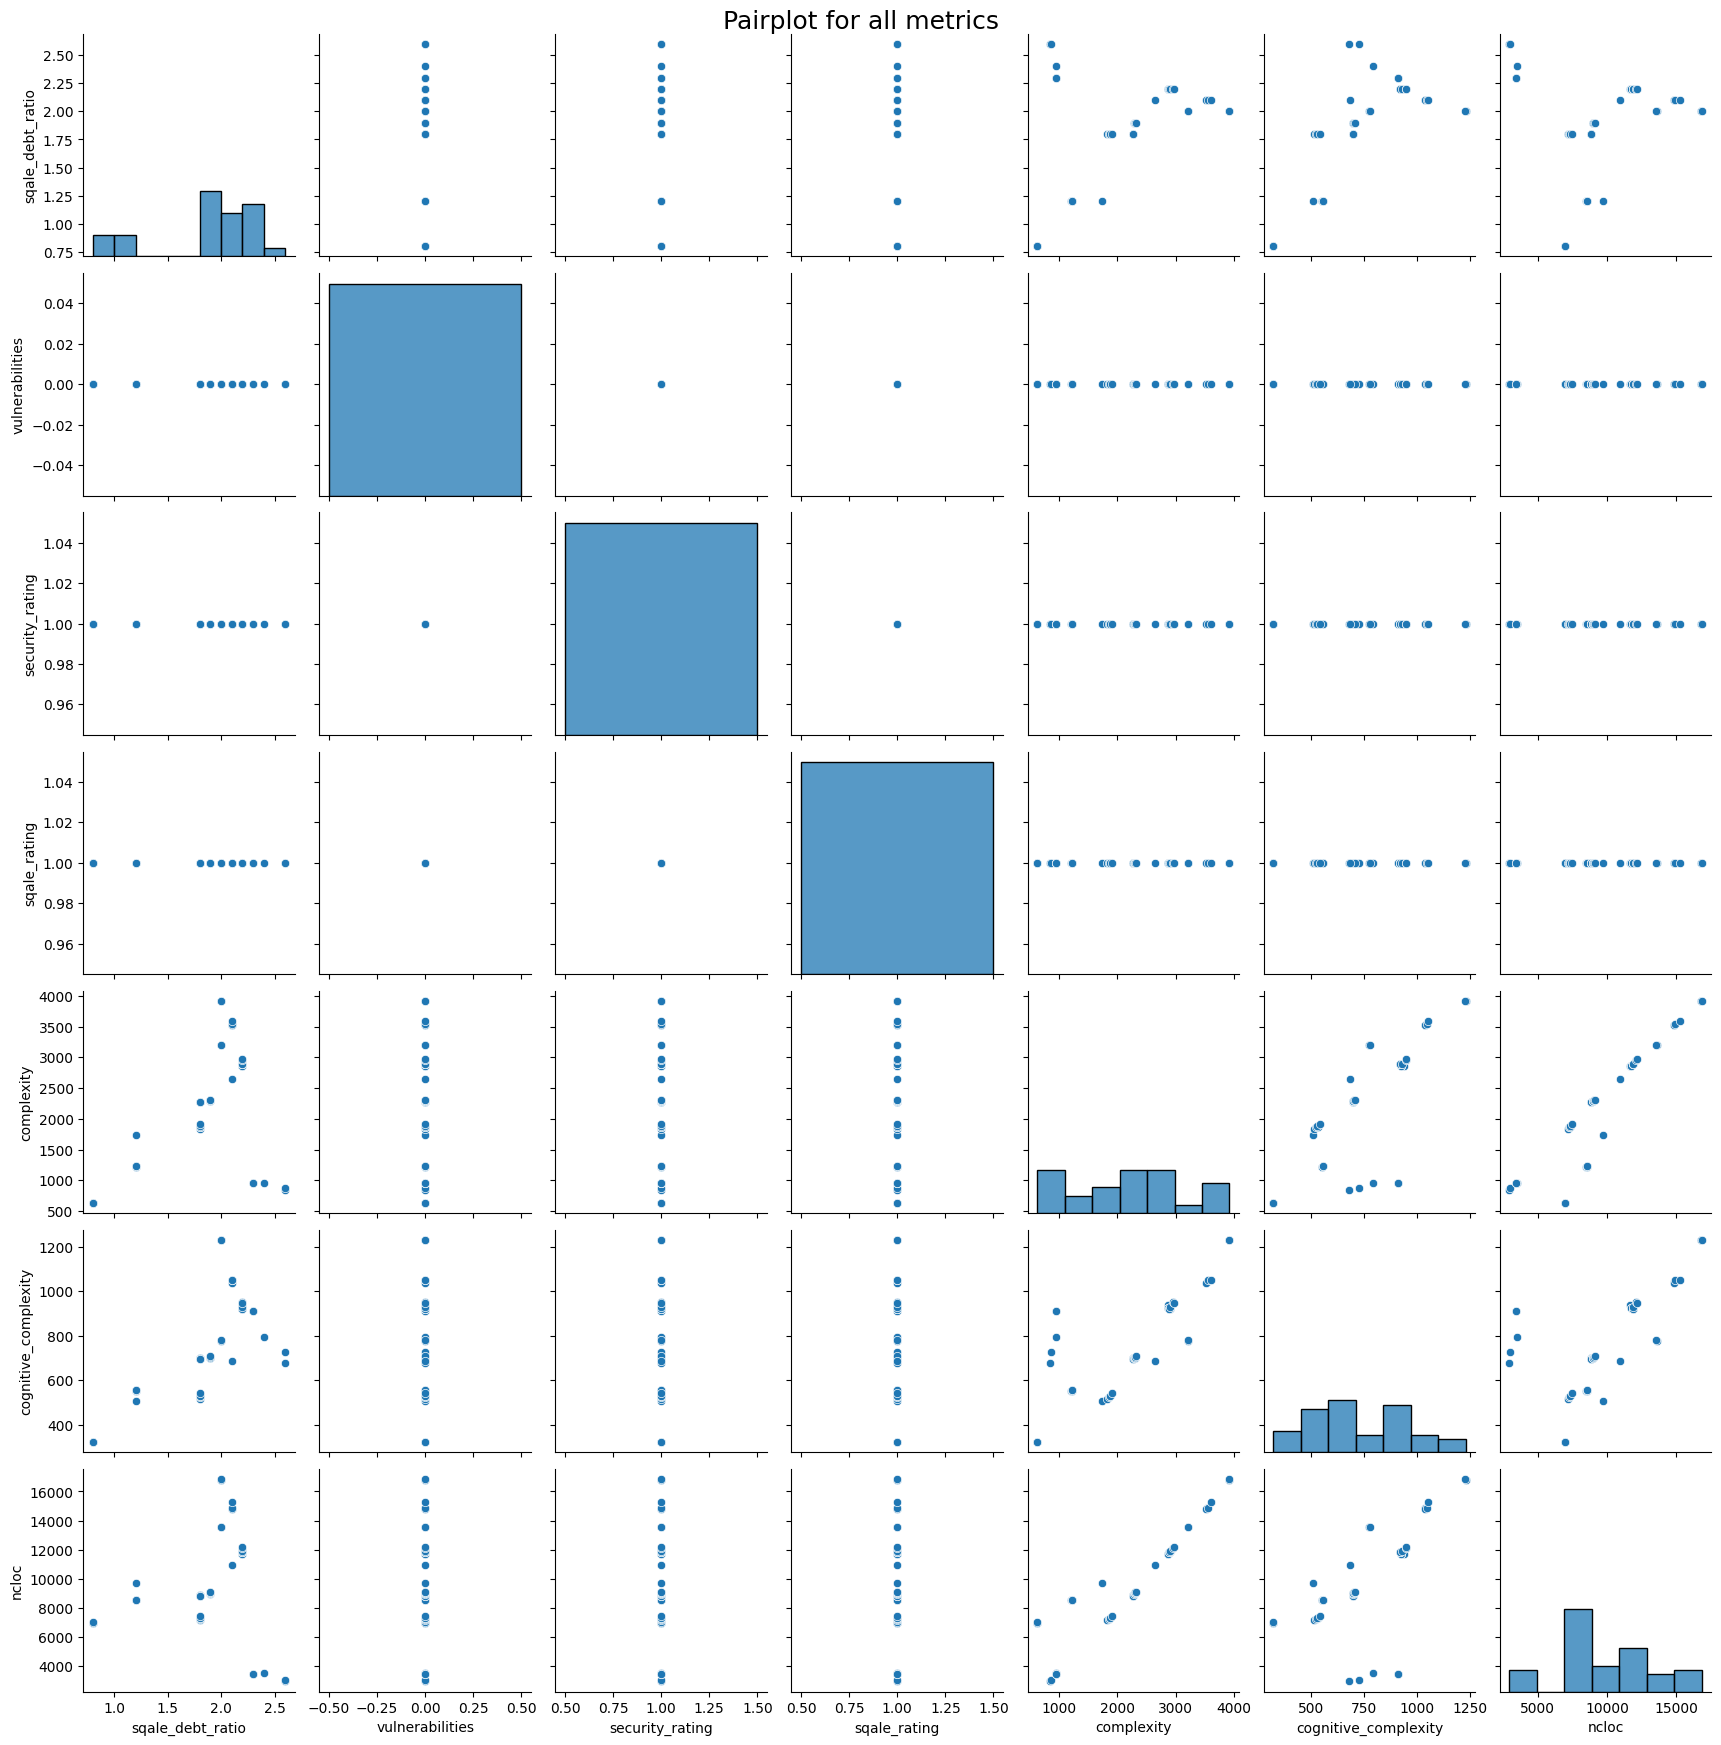

In [45]:
sns.pairplot(df[columns_for_controlChart])
plt.suptitle('Pairplot for all metrics', y=1., size=18)
plt.show()

### Visualization using Machine Learning Models

In [46]:
X = df[['ncloc']]
target_columns = ['complexity', 'cognitive_complexity', 'sqale_rating']

In [47]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=42),
    'Support Vector': SVR(kernel='linear'),
    'MLP Regressor': MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
}

Linear Regression Model for complexity:
Mean Squared Error: 93300.16376511121
R-squared: 0.8519011074394924

Decision Tree Model for complexity:
Mean Squared Error: 383.1
R-squared: 0.9993918908236563

Random Forest Model for complexity:
Mean Squared Error: 3377.65961
R-squared: 0.9946385126509883

Gradient Boosting Model for complexity:
Mean Squared Error: 31215.655722188407
R-squared: 0.9504502044107354

Support Vector Model for complexity:
Mean Squared Error: 83421.29988799505
R-squared: 0.8675822031730457

MLP Regressor Model for complexity:
Mean Squared Error: 157652.63095654646
R-squared: 0.7497519927971897

Linear Regression Model for cognitive_complexity:
Mean Squared Error: 11191.035417931602
R-squared: 0.7707338068755138

Decision Tree Model for cognitive_complexity:
Mean Squared Error: 16.0
R-squared: 0.9996722145044672

Random Forest Model for cognitive_complexity:
Mean Squared Error: 688.9335699999995
R-squared: 0.9858860980230233

Gradient Boosting Model for cognitive_com

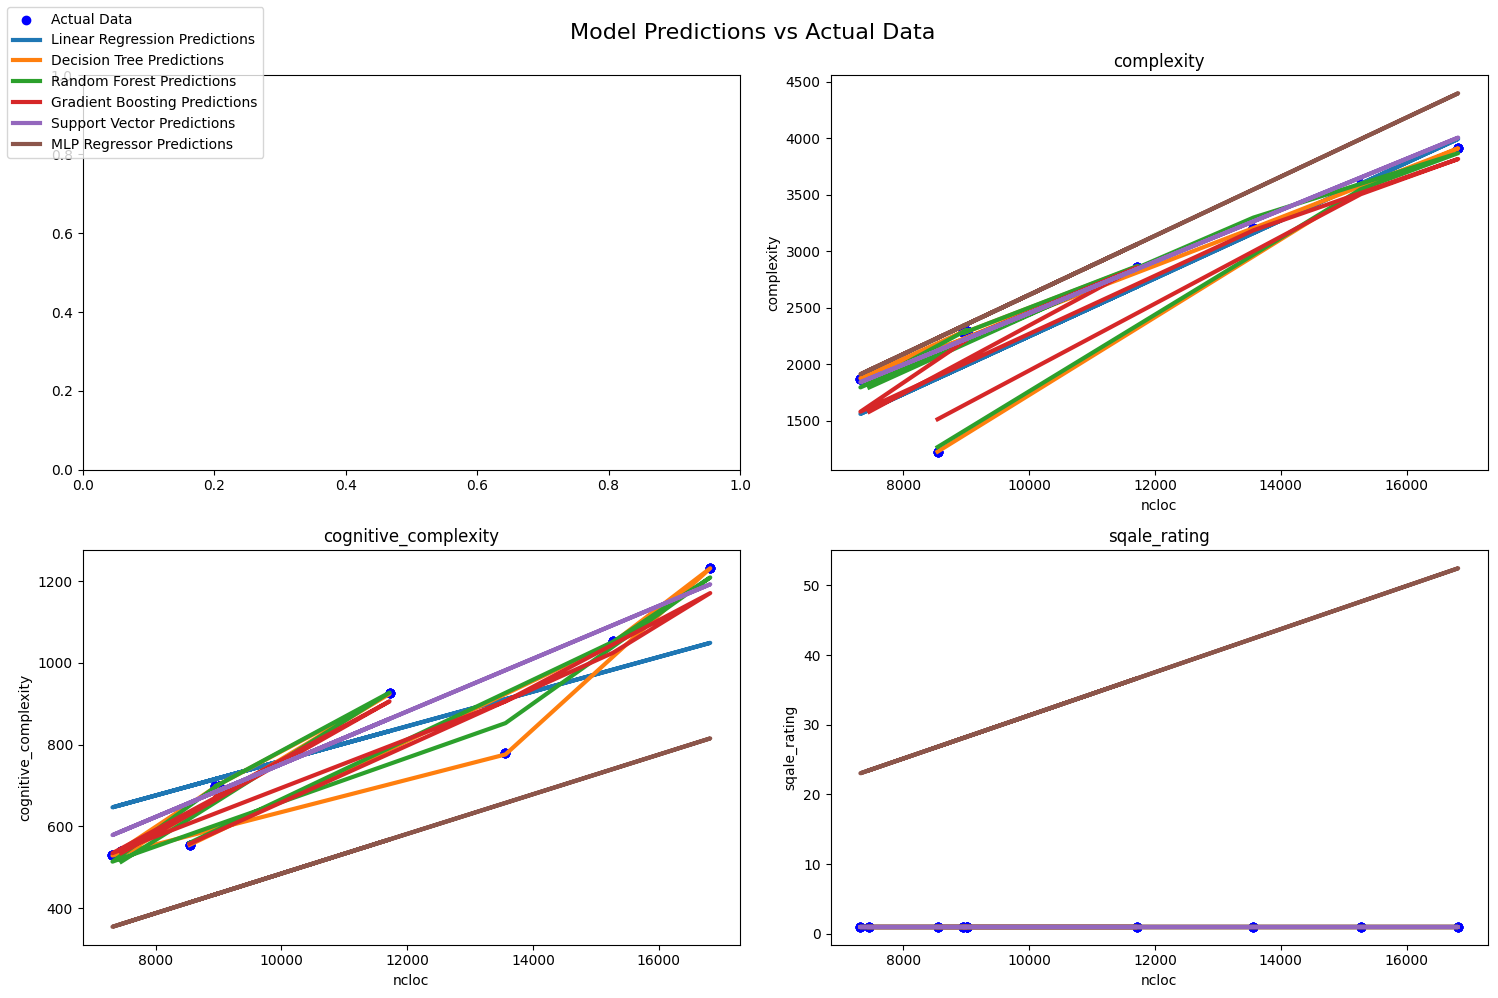

In [48]:
# Create a 2x2 grid for the plots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Create a list to store handles for the legend
handles = []


# Loop over each target variable
for i, target in enumerate(target_columns):
    y = df[target]

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Evaluate models
    results = {}
    for j, (name, model) in enumerate(models.items()):
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)

        mse = mean_squared_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)

        results[name] = {'MSE': mse, 'R-squared': r2}

        # Scatter plot of actual data points
        scatter = axs[(i+1)//2, (i+1)%2].scatter(X_test, y_test, color='blue')

        # Regression line
        line = axs[(i+1)//2, (i+1)%2].plot(X_test, predictions, linewidth=3)

        # Set general name for the subplot
        axs[(i+1)//2, (i+1)%2].set_title(target_columns[i])

        axs[(i+1)//2, (i+1)%2].set_xlabel('ncloc')
        axs[(i+1)//2, (i+1)%2].set_ylabel(target)

        # Store handles for the legend
        if i == 0 and j == 0:
            handles.append(scatter)
        if i == 0:
            handles.extend(line)

    # Display results
    for name, metrics in results.items():
        print(f"{name} Model for {target}:")
        print(f"Mean Squared Error: {metrics['MSE']}")
        print(f"R-squared: {metrics['R-squared']}")
        print()

# Create a single legend for all subplots
labels = ['Actual Data'] + [name + ' Predictions' for name in models.keys()]
fig.legend(handles, labels, loc='upper left')

# Set a general title for the figure
fig.suptitle('Model Predictions vs Actual Data', fontsize=16)

plt.tight_layout()
plt.show()

Ensemble Model for complexity:
Mean Squared Error: 20860.218746714534
R-squared: 0.966887782718838

Ensemble Model for cognitive_complexity:
Mean Squared Error: 1537.0795954327673
R-squared: 0.9685104751961076

Ensemble Model for sqale_rating:
Mean Squared Error: 0.0
R-squared: 1.0



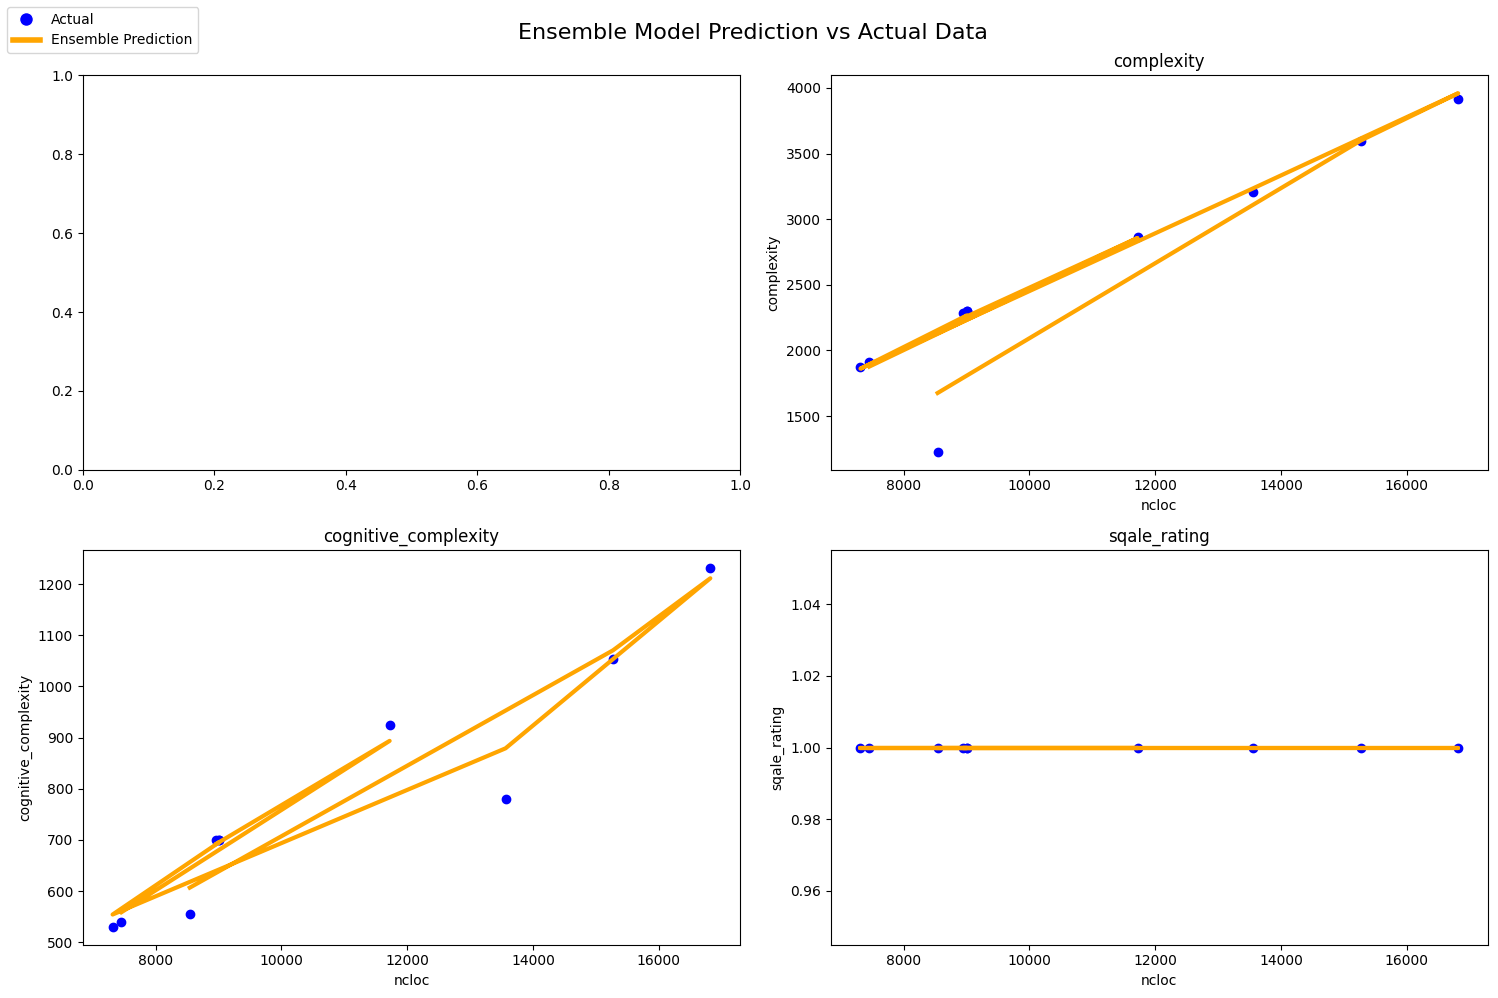

In [49]:
# Create a 2x2 grid for the plots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Define the Ensemble model
models = {
    'Ensemble': VotingRegressor([('SVM', SVR(kernel='linear')), ('Decision Tree', DecisionTreeRegressor(random_state=42))])
}

# Create custom legend handles and labels
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Actual', markerfacecolor='blue', markersize=10),
                   Line2D([0], [0], color='orange', lw=4, label='Ensemble Prediction')]

# Loop over each target variable
for i, target in enumerate(target_columns):
    y = df[target]

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Evaluate the Ensemble model
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)

        mse = mean_squared_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)

        results[name] = {'MSE': mse, 'R-squared': r2}

        # Scatter plot of actual data points
        scatter = axs[(i+1)//2, (i+1)%2].scatter(X_test, y_test, color='blue')

        # Regression line
        line = axs[(i+1)//2, (i+1)%2].plot(X_test, predictions, linewidth=3, color='orange')

        axs[(i+1)//2, (i+1)%2].set_title(f'{target}')
        axs[(i+1)//2, (i+1)%2].set_xlabel('ncloc')
        axs[(i+1)//2, (i+1)%2].set_ylabel(target)

    # Display results
    for name, metrics in results.items():
        print(f"{name} Model for {target}:")
        print(f"Mean Squared Error: {metrics['MSE']}")
        print(f"R-squared: {metrics['R-squared']}")
        print()

# Add the legend to the figure
fig.legend(handles=legend_elements, loc='upper left')

# Set a general title for the figure
fig.suptitle('Ensemble Model Prediction vs Actual Data', fontsize=16)

plt.tight_layout()
plt.show()